# Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Flatten, Dense,Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping


# Data splitting and Data Augmentation

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.2, # Splits 20% of data randomly as validation data from the directory
    # We normalise the pixel so we have to deal with just 0-1 values rather than 0-255 pixel values
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
   )

# Training Data

In [4]:
data_path=""

In [5]:
train_dataset = datagen.flow_from_directory(
    data_path,
    target_size = (224,224),
    # Number of Batches
    batch_size = 32,
    subset = 'training',
    shuffle = True,
)

Found 16464 images belonging to 3 classes.


# Testing Data

In [6]:
validation_dataset = datagen.flow_from_directory(
    data_path,
    target_size = (224,224),
    batch_size = 32,
    subset = 'validation',
)

Found 4116 images belonging to 3 classes.


# CNN MODEL

In [12]:
def My_CNNmodel():

    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
    ])


    model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
             tf.keras.metrics.Precision(name='Precision'), 
             tf.keras.metrics.Recall(name='Recall'), 
             
            ]
)
    return model
model = My_CNNmodel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

# Early Stopping to avoid overfitting

In [13]:

early_stop = EarlyStopping(monitor='val_loss', patience=3)



# Training the CNN model

In [14]:
history1 = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset,callbacks=[early_stop])

Epoch 1/10
516/516 [==============================] - 550s 1s/step - loss: 4.7966 - categorical_accuracy: 0.0105 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - val_loss: 4.7814 - val_categorical_accuracy: 0.0123 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 2/10
516/516 [==============================] - 539s 1s/step - loss: 4.7103 - categorical_accuracy: 0.0178 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - val_loss: 4.6394 - val_categorical_accuracy: 0.0219 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 3/10
516/516 [==============================] - 542s 1s/step - loss: 4.5455 - categorical_accuracy: 0.0287 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - val_loss: 4.4938 - val_categorical_accuracy: 0.0351 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00
Epoch 4/10
516/516 [==============================] - 533s 1s/step - loss: 4.4255 - categorical_accuracy: 0.0396 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - val_loss: 4.3915 - val_categorical_accuracy: 

# Plotting Accuracy and Loss for CNN MODEL

Text(0.5, 1.0, 'Training and validation loss')

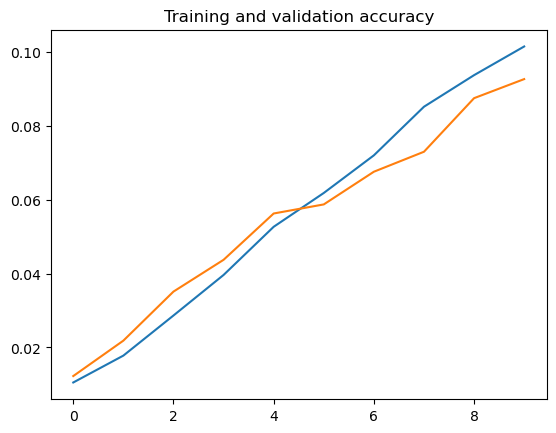

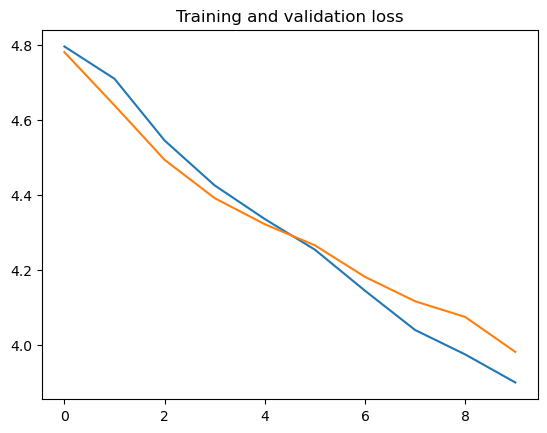

In [43]:
acc      = history1.history['categorical_accuracy' ]
val_acc  = history1.history[ 'val_categorical_accuracy' ]
loss     = history1.history['loss' ]
val_loss = history1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

# Saving Model

In [15]:
import pickle
with open('history_Normal.pkl',"wb") as f:
  pickle.dump(history1.history,f)


# Evaluate the model

In [17]:
#Normal CNN
scores_normal = model.evaluate(validation_dataset)

128/128 [==============================] - 46s 362ms/step - loss: 3.9879 - categorical_accuracy: 0.1004 - Precision: 0.6250 - Recall: 0.0012


# Metrics

In [22]:
accuracy_normal = scores_normal[1]
precision_normal = scores_normal[2]
recall_normal = scores_normal[3]
f1_normal = 2*(precision_normal*recall_normal)/(precision_normal+recall_normal)
print(accuracy_normal)
print(precision_normal)
print(recall_normal)
print(f1_normal)

0.10044204443693161
0.625
0.0012278978247195482
0.0024509803639074608


# Pretrained Model

In [23]:
base_model = tf.keras.applications.InceptionResNetV2(input_shape=(224,224,3),weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()
model2 = tf.keras.models.Sequential()
model2.add(base_model)
model2.add(tf.keras.layers.GlobalAveragePooling2D())
model2.add(tf.keras.layers.Dense(1024, activation='relu'))
model2.add(tf.keras.layers.Dense(516, activation='relu'))
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(120, activation='softmax'))

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_209 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_209[0][0]']             
 Normalization)                 )                                               

 conv2d_220 (Conv2D)            (None, 25, 25, 64)   12288       ['average_pooling2d_1[0][0]']    
                                                                                                  
 batch_normalization_208 (Batch  (None, 25, 25, 96)  288         ['conv2d_214[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 25, 25, 64)  192         ['conv2d_216[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_213 (Batch  (None, 25, 25, 96)  288         ['conv2d_219[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 activation_224 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_224[0][0]']
                                                                                                  
 conv2d_228 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_231 (Conv2D)            (None, 25, 25, 48)   13824       ['activation_224[0][0]']         
                                                                                                  
 batch_normalization_222 (Batch  (None, 25, 25, 32)  96          ['conv2d_228[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_232 (Batch  (None, 25, 25, 64)  192         ['conv2d_238[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_227 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_227[0][0]']
                                                                                                  
 activation_229 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_229[0][0]']
                                                                                                  
 activation_232 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_232[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_227[0][0]',         
          

                                                                                                  
 batch_normalization_240 (Batch  (None, 25, 25, 32)  96          ['conv2d_246[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_243 (Batch  (None, 25, 25, 48)  144         ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_240 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_240[0][0]']
                                                                                                  
 activation_243 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_243[0][0]']
          

 activation_250 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_250[0][0]']
                                                                                                  
 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_245[0][0]',         
                                                                  'activation_247[0][0]',         
                                                                  'activation_250[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
          

 activation_258 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_258[0][0]']
                                                                                                  
 activation_261 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_263 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_265 (Conv2D)            (None, 25, 25, 32)   9216        ['activation_258[0][0]']         
                                                                                                  
 conv2d_268 (Conv2D)            (None, 25, 25, 64)   27648       ['activation_261[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 block35_9 (Lambda)             (None, 25, 25, 320)  0           ['block35_8_ac[0][0]',           
                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_278 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_272 (Batch  (None, 25, 25, 32)  96          ['conv2d_278[0][0]']             
 Normalization)                                                                                   
          

 activation_275 (Activation)    (None, 12, 12, 384)  0           ['batch_normalization_275[0][0]']
                                                                                                  
 activation_278 (Activation)    (None, 12, 12, 384)  0           ['batch_normalization_278[0][0]']
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
 )                                                                                                
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_275[0][0]',         
                                )                                 'activation_278[0][0]',         
                                                                  'max_pooling2d_12[0][0]']       
          

                                )                                                                 
                                                                                                  
 block17_2 (Lambda)             (None, 12, 12, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_294 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_nor

                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 12, 12, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_302 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_296 (Batch  (None, 12, 12, 128)  384        ['conv2d_302[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_310 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_304 (Batch  (None, 12, 12, 128)  384        ['conv2d_310[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_311 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_304[0][0]']         
          

                                                                                                  
 batch_normalization_312 (Batch  (None, 12, 12, 128)  384        ['conv2d_318[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_312 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_312[0][0]']
                                                                                                  
 conv2d_319 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_312[0][0]']         
                                                                                                  
 batch_normalization_313 (Batch  (None, 12, 12, 160)  480        ['conv2d_319[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_320 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_320[0][0]']
                                                                                                  
 conv2d_327 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_320[0][0]']         
                                                                                                  
 batch_normalization_321 (Batch  (None, 12, 12, 160)  480        ['conv2d_327[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_321 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_321[0][0]']
                                                                                                  
 conv2d_32

 conv2d_335 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_328[0][0]']         
                                                                                                  
 batch_normalization_329 (Batch  (None, 12, 12, 160)  480        ['conv2d_335[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_329 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_329[0][0]']
                                                                                                  
 conv2d_333 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_336 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_329[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_337 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_337[0][0]']
                                                                                                  
 conv2d_341 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_344 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_337[0][0]']         
                                                                                                  
 batch_normalization_335 (Batch  (None, 12, 12, 192)  576        ['conv2d_341[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_349 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_16_ac[0][0]']          
                                                                                                  
 conv2d_352 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_345[0][0]']         
                                                                                                  
 batch_normalization_343 (Batch  (None, 12, 12, 192)  576        ['conv2d_349[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_346 (Batch  (None, 12, 12, 192)  576        ['conv2d_352[0][0]']             
 Normalization)                                                                                   
          

 conv2d_360 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_353[0][0]']         
                                                                                                  
 batch_normalization_351 (Batch  (None, 12, 12, 192)  576        ['conv2d_357[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_354 (Batch  (None, 12, 12, 192)  576        ['conv2d_360[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_351 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_351[0][0]']
                                                                                                  
 activatio

 batch_normalization_364 (Batch  (None, 12, 12, 288)  864        ['conv2d_370[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_359 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_359[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_364[0][0]']
                                                                                                  
 conv2d_366 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_359[0][0]']         
          

 conv2d_378 (Conv2D)            (None, 5, 5, 224)    129024      ['activation_371[0][0]']         
                                                                                                  
 batch_normalization_372 (Batch  (None, 5, 5, 224)   672         ['conv2d_378[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_372 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_372[0][0]']
                                                                                                  
 conv2d_376 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_379 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_372[0][0]']         
          

 conv2d_384 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_387 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_380[0][0]']         
                                                                                                  
 batch_normalization_378 (Batch  (None, 5, 5, 192)   576         ['conv2d_384[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_381 (Batch  (None, 5, 5, 256)   768         ['conv2d_387[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_389 (Batch  (None, 5, 5, 256)   768         ['conv2d_395[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_386 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_386[0][0]']
                                                                                                  
 activation_389 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_389[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_386[0][0]',         
                                                                  'activation_389[0][0]']         
                                                                                                  
 block8_6_

 block8_8_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_394[0][0]',         
                                                                  'activation_397[0][0]']         
                                                                                                  
 block8_8_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_8_mixed[0][0]']         
                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_40

                                                                                                  
 conv_7b (Conv2D)               (None, 5, 5, 1536)   3194880     ['block8_10[0][0]']              
                                                                                                  
 conv_7b_bn (BatchNormalization  (None, 5, 5, 1536)  4608        ['conv_7b[0][0]']                
 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
Total params: 54,336,736
Trainable params: 0
Non-trainable params: 54,336,736
__________________________________________________________________________________________________


# Compiling the Pretrained Model 

In [27]:
#Compile the model
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
             tf.keras.metrics.Precision(name='Precision'), 
             tf.keras.metrics.Recall(name='Recall'), 
             #tfa.metrics.F1Score(num_classes = 120,average=None)
            ]
)

# Train the model

In [28]:
#stop training when the validation loss stop decreasing, for this we are considering the last 3 epoches
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
history2 = model2.fit(train_dataset,
                              epochs=10,
                              validation_data=(validation_dataset),
                              callbacks=[early_stop]
                             )

Epoch 1/10
516/516 [==============================] - 1046s 2s/step - loss: 1.2651 - categorical_accuracy: 0.6914 - Precision: 0.8177 - Recall: 0.6086 - val_loss: 0.8962 - val_categorical_accuracy: 0.7667 - val_Precision: 0.8514 - val_Recall: 0.7205
Epoch 2/10
516/516 [==============================] - 1031s 2s/step - loss: 0.9133 - categorical_accuracy: 0.7536 - Precision: 0.8344 - Recall: 0.6958 - val_loss: 0.9175 - val_categorical_accuracy: 0.7606 - val_Precision: 0.8578 - val_Recall: 0.6992
Epoch 3/10
516/516 [==============================] - 1038s 2s/step - loss: 0.8578 - categorical_accuracy: 0.7643 - Precision: 0.8419 - Recall: 0.7124 - val_loss: 0.9425 - val_categorical_accuracy: 0.7493 - val_Precision: 0.8314 - val_Recall: 0.6989
Epoch 4/10
516/516 [==============================] - 913s 2s/step - loss: 0.8119 - categorical_accuracy: 0.7722 - Precision: 0.8512 - Recall: 0.7214 - val_loss: 0.8939 - val_categorical_accuracy: 0.7593 - val_Precision: 0.8395 - val_Recall: 0.7154
E

# Plotting Accuracy and Loss for Pretrained Model

Text(0.5, 1.0, 'Training and validation loss')

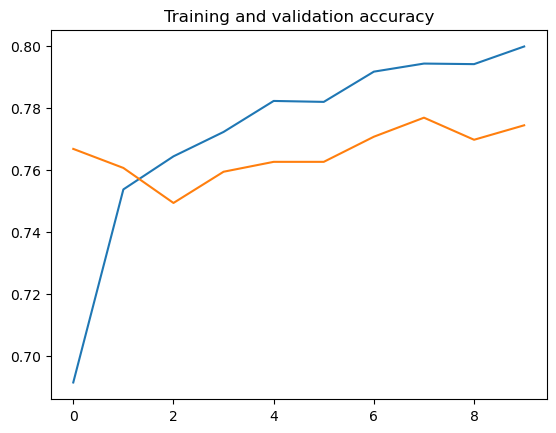

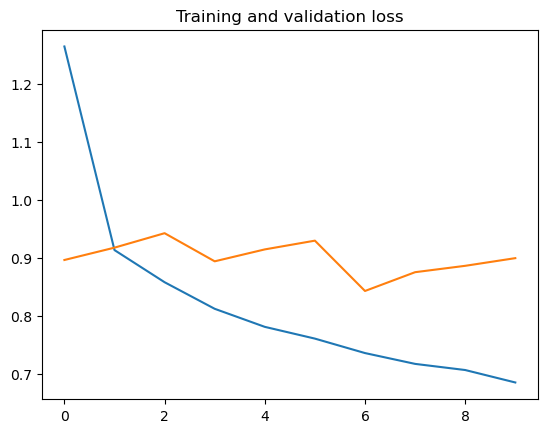

In [44]:

acc      = history2.history['categorical_accuracy' ]
val_acc  = history2.history[ 'val_categorical_accuracy' ]
loss     = history2.history['loss' ]
val_loss = history2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

# Saving the History into a Pickle file

In [29]:
import pickle
with open('history_Pretrained',"wb") as a:
  pickle.dump(history2.history,a)

In [30]:
#Pretrained Model
scores_pretrained = model2.evaluate(validation_dataset)

128/128 [==============================] - 205s 2s/step - loss: 0.9126 - categorical_accuracy: 0.7692 - Precision: 0.8470 - Recall: 0.7218


In [31]:
accuracy_pretrained = scores_pretrained[1]
precision_pretrained = scores_pretrained[2]
recall_pretrained = scores_pretrained[3]
#f1_pretrained = scores_pretrained[4]
f1_pretrained = 2*(precision_pretrained*recall_pretrained)/(precision_pretrained+recall_pretrained)

# Print the results
print("Accuracy:", accuracy_pretrained)
print("Precision:", precision_pretrained)
print("Recall:", recall_pretrained)
print("F1 Score:", f1_pretrained)

Accuracy: 0.7691552042961121
Precision: 0.8469740748405457
Recall: 0.7217583656311035
F1 Score: 0.7793688818024747


# Append to csv file

In [33]:
df = pd.DataFrame({'accuracy': accuracy_normal*100, 'precision': precision_normal*100, 'recall': precision_normal*100, 'F1-score': f1_normal*100,'Model':'Normal'}, index=[0])
df = df.append({'accuracy': accuracy_pretrained*100, 'precision': precision_pretrained*100, 'recall': recall_pretrained*100, 'F1-score': f1_pretrained*100,'Model':'Pretrained'}, ignore_index=True)
df.to_csv('model.csv', index=False)


# Loading Pickle Files

In [48]:
import pickle
with open('history_Normal.pkl', 'rb') as f:
     normal= pickle.load(f)
with open('history_Pretrained.pkl', 'rb') as f:
    pretrained = pickle.load(f)

In [49]:
print(normal)

{'loss': [4.796606540679932, 4.710320949554443, 4.545513153076172, 4.42547082901001, 4.3357014656066895, 4.253893852233887, 4.144208908081055, 4.039315700531006, 3.974022626876831, 3.8991219997406006], 'categorical_accuracy': [0.010540343821048737, 0.01780954748392105, 0.028652774170041084, 0.039617154747247696, 0.052641142159700394, 0.061788223683834076, 0.07196510583162308, 0.08511024713516235, 0.09365156292915344, 0.10140538215637207], 'Precision': [0.0, 0.0, 0.0, 0.0, 0.0, 0.2222222238779068, 0.6111111044883728, 0.4000000059604645, 0.4933333396911621, 0.5104166865348816], 'Recall': [0.0, 0.0, 0.0, 0.0, 0.0, 0.00012115338176954538, 0.0006663436070084572, 0.000969227054156363, 0.00224133743904531, 0.0029682577587664127], 'val_loss': [4.781423568725586, 4.639370918273926, 4.493825435638428, 4.391468524932861, 4.321813106536865, 4.2654643058776855, 4.1812639236450195, 4.116066932678223, 4.07407283782959, 3.9808549880981445], 'val_categorical_accuracy': [0.01227897871285677, 0.021856581

In [50]:
print(pretrained)

{'loss': [1.2650846242904663, 0.9133004546165466, 0.8577839732170105, 0.8118758797645569, 0.7806732058525085, 0.7603690028190613, 0.7353973388671875, 0.7166948318481445, 0.7060880064964294, 0.6845786571502686], 'categorical_accuracy': [0.6913617849349976, 0.7536345720291138, 0.7642961144447327, 0.7721710801124573, 0.7821662425994873, 0.7818633317947388, 0.7916162014007568, 0.7942209839820862, 0.794039249420166, 0.7997334599494934], 'Precision': [0.8177452087402344, 0.8343745470046997, 0.8419356942176819, 0.8511900305747986, 0.8520141243934631, 0.850722074508667, 0.8588991165161133, 0.8568449020385742, 0.8604570031166077, 0.8624800443649292], 'Recall': [0.608553409576416, 0.6957838535308838, 0.7124424576759338, 0.7214078307151794, 0.7303125858306885, 0.7315241098403931, 0.7448509931564331, 0.7465471029281616, 0.7459413409233093, 0.7537557482719421], 'val_loss': [0.8961889147758484, 0.9175163507461548, 0.9424968957901001, 0.8939017057418823, 0.9144888520240784, 0.9296066761016846, 0.8426